# *Data Wrangling*
Outlier's Removal

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


In [2]:
data = pd.read_csv('/kaggle/input/weight-height/weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:ylabel='Frequency'>

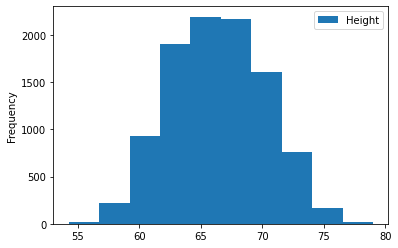

In [4]:
data.plot(y='Height',kind='hist')

<AxesSubplot:ylabel='Frequency'>

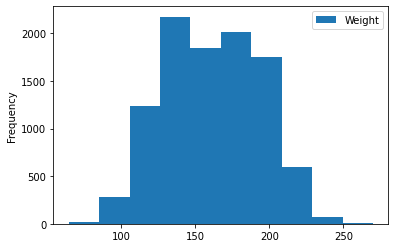

In [5]:
data.plot(y='Weight',kind='hist')

In [6]:
import seaborn as sns

In [7]:
data.shape

(10000, 3)

In [8]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

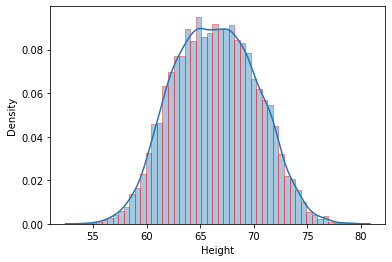

In [9]:
# Normal distribution or Gaussian distribution

sns.distplot(data['Height'],hist_kws=dict(edgecolor='red'))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

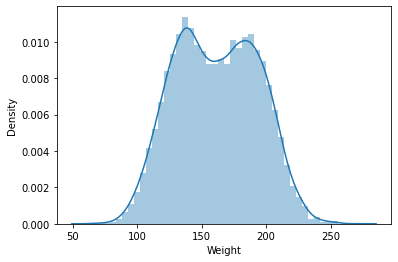

In [10]:
sns.distplot(data['Weight'],)

In [11]:
mean = data['Height'].mean()
mean

66.36755975482106

In [12]:
std = data['Height'].std()
std

3.8475281207732324

In [13]:
negthreestd = mean - 3*std
negthreestd

54.82497539250136

In [14]:
posthreestd = mean + 3*std
posthreestd

77.91014411714076

In [15]:
j1 = data[data['Height'] < negthreestd]
j1

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [16]:
j2 = data[data['Height'] > posthreestd]
j2

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [17]:
dataheight = data.drop(columns='Weight')

In [19]:
dataheightnew = dataheight[(dataheight.Height>negthreestd)&(dataheight.Height<posthreestd)]

In [20]:
dataheightnew

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243
